# Decsion Trees and Examples

Today we will learn a new type of model, called *Decision Trees* and then explore a number of models using these algorithms. Decision trees represent a significant departure from previous models. Their primary advantage is that they produce models that are easy to explain to *non-experts* and they are also capable of distilling the most important features in a model.

However Decision Trees do not typically perform well on data as a model (again we see this sort of dichotomy between types of models), so we will also explore some techniques for using multiple decision trees as a model. These will have improved performance as models but will not be as easy to interpret.

Decsision Trees are especially important models in my work on Student Success as they represent the actual placement process we use at universities to determine what mathematics course students should take and what supports they need. [Here is an example of our placement chart at UNC.](https://www.unco.edu/nhs/mathematical-sciences/placement/results.aspx) You will see very quickly that this is a basic example of a decision tree. With that in mind you can see that they appear in many other places, though perhaps as models that have not been developed algorithmicly, trained on data, or tested.

Perhaps the best place to start is with an example:

In [1]:
import pandas as pa
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolor
import numpy as np

In [2]:
mpg = pa.read_csv('Data Sets/auto-mpg.csv', names=['mpg', 'cylinders', 'displacement', 'horsepower', 
                                                   'weight', 'acceleration', 'model year', 'origin', 'car name'])
mpg.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,1,"\t""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,1,"\t""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,1,"\t""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,1,"\t""ford torino"""
5,15.0,8,429.0,198,4341,10.0,70,1,"\t""ford galaxie 500"""
6,14.0,8,454.0,220,4354,9.0,70,1,"\t""chevrolet impala"""
7,14.0,8,440.0,215,4312,8.5,70,1,"\t""plymouth fury iii"""
8,14.0,8,455.0,225,4425,10.0,70,1,"\t""pontiac catalina"""
9,15.0,8,390.0,190,3850,8.5,70,1,"\t""amc ambassador dpl"""


In [3]:
mpg = mpg[mpg.horsepower!='?']
mpg.horsepower = mpg.horsepower.astype('int')

In [4]:
X = np.array(mpg[['horsepower', 'weight']])
y = np.array(mpg['mpg'])

In [5]:
import numpy.random as rn

One note here:  I've realized that we probably should be using a different permutation for each run even across multiple models so for this class I have moved the training/testing set division inside of the plot command. This also means that the fit for the model is in there as well. The function now returns the fitted model. 

In [9]:
# A bit of code for plotting the contour in a regression problem with two predictors
# Also prints out the training and testing errors

def plot_reg_model(reg, X, y):

    # We shuffle the data using a random permutation

    n = X.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]       # Then create the test
    y_test = y[:test]
    X_train = X[test:]     # and train sets
    y_train = y[test:]
    
    reg.fit(X_train, y_train) # Fit the model
     
    nn = 200
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),   # Changed the function to use linspace rather than arrange
        np.linspace(y_min, y_max, nn))                    # This keeps us from having to adjust h.
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()]) # predict

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))
    
    return reg

Check how the existing regression algorithms from our toolbox do on this data:

In [10]:
from sklearn.linear_model import LinearRegression

Training R2: 0.7058079125352104
Testing R2: 0.7048823472269077


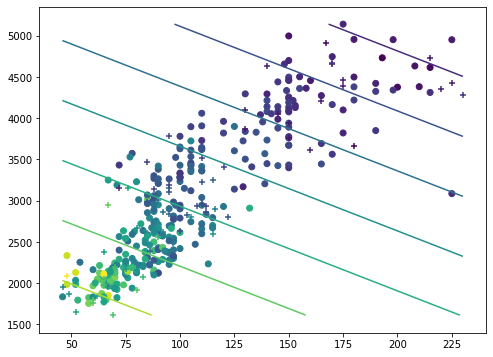

In [11]:
reg = LinearRegression()
plot_reg_model(reg, X, y);

In [12]:
from sklearn.linear_model import Ridge

Training R2: 0.7048521505070366
Testing R2: 0.7094878116361958


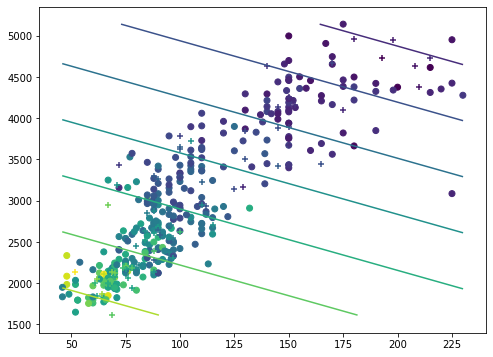

In [16]:
reg = Ridge(alpha=2)
plot_reg_model(reg, X, y);

In [14]:
from sklearn.linear_model import Lasso

Training R2: 0.6954014994941229
Testing R2: 0.7322470402350347


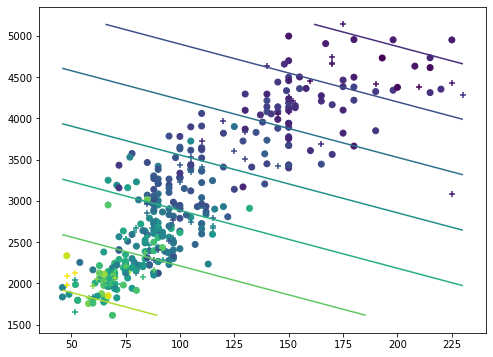

In [33]:
reg=Lasso(alpha=1)
plot_reg_model(reg, X, y);

Interestingly we get slightly better performance from Lasso depsite only using two features.

In [18]:
from sklearn.neighbors import KNeighborsRegressor

Training R2: 0.7741649097789456
Testing R2: 0.7764313472866562


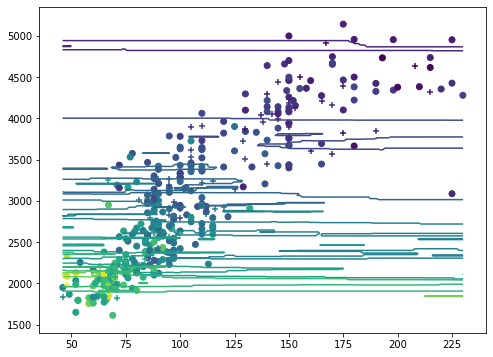

In [32]:
knn = KNeighborsRegressor(n_neighbors=6)
plot_reg_model(knn, X, y);

## Regression Trees

In [31]:
from sklearn.tree import DecisionTreeRegressor

Training R2: 0.8512457569636297
Testing R2: 0.471425164783032


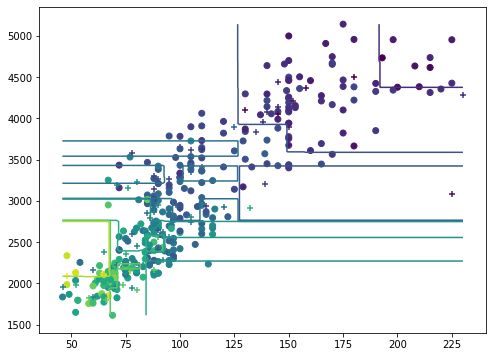

In [46]:
tree = DecisionTreeRegressor(min_samples_leaf=5)
plot_reg_model(tree, X, y);

Below are two tricks for thinking about and visualizing Decision Trees. This first is representing it as the actual tree or decision process. The idea is that starting at the top you follow the rules for a particular datapoint until you reach a leaf. The value you assign from the model in each leaf is the mean of the results that are there.

The Tree has been built by choosing a split at each point that decreases the Mean Squared Error on the training data in that node (though the objective function can be modified). This tree picture then explains what we are seeing in the contour plot. The region is being divided into rectangular regions and then the value of the result is being estimated by the mean in each region of the training data.

The *min_samples_leaf* parameter sets the model to reject any split of a node that would result in fewer than five samples in one of the leaves. This helps smooth the result (and gives a contour plot that is a little cleaerer for this example. Particularly with regression this parameter will help avoid overfitting the tree. 

Note that the model, while it performed well on the training data did not perform well on the testing data compared with the other models we have for regression.

In [42]:
from sklearn.tree import export_graphviz
import graphviz

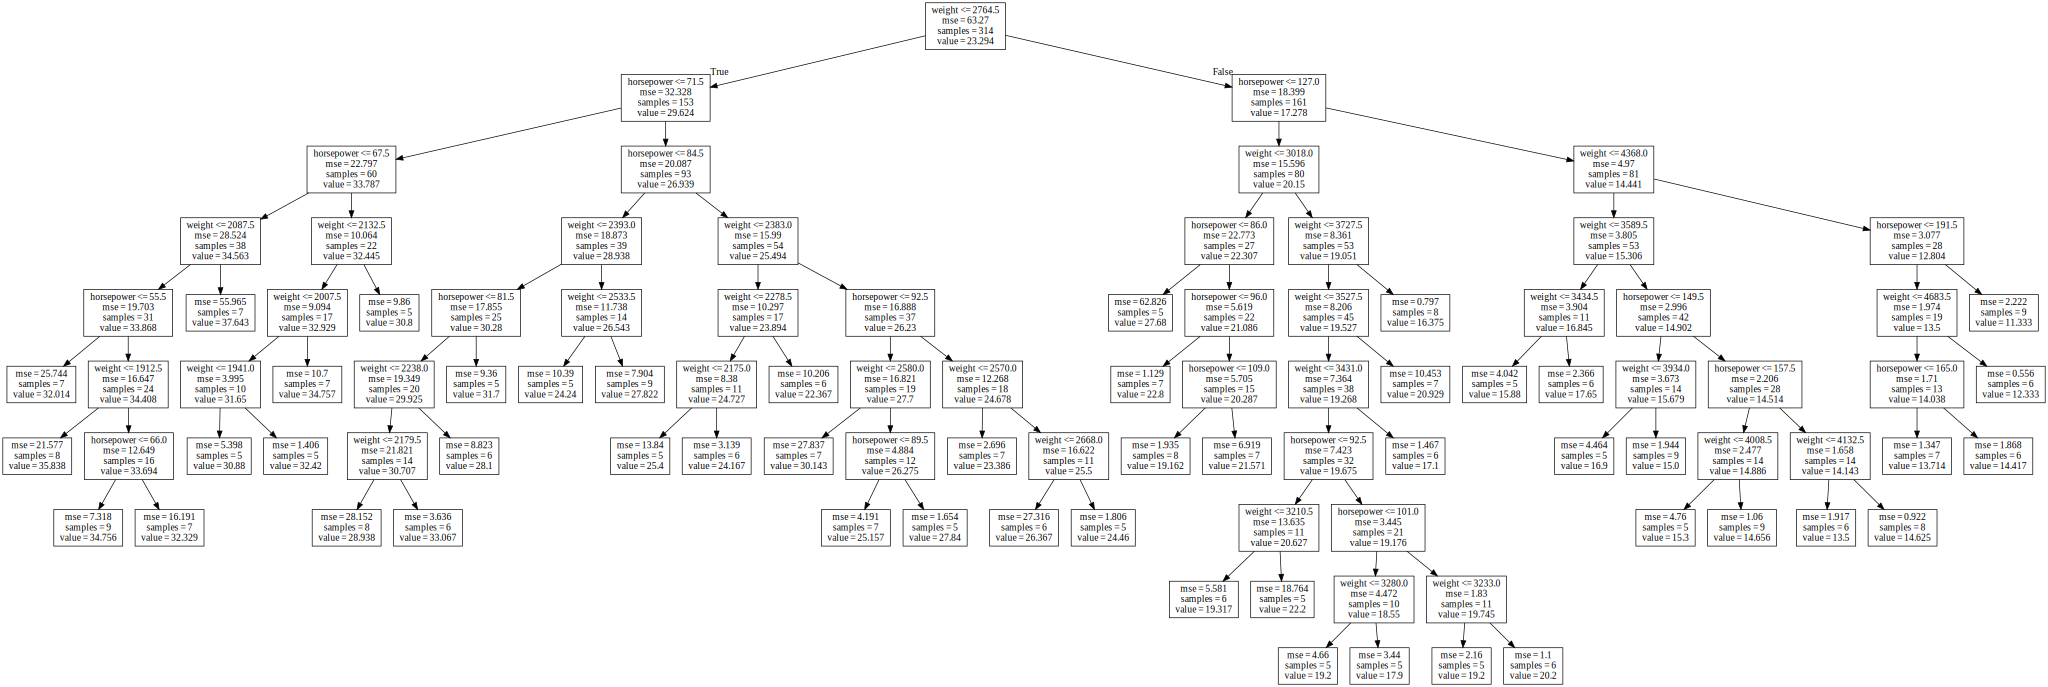

In [48]:
export_graphviz(tree, out_file='tree.dot', feature_names=['horsepower', 'weight'])

with open('tree.dot') as f:
    dot_graph = f.read()

display( graphviz.Source(dot_graph) )

## Classification Tree

We can use the same idea for classification. We will choose the value or class of a leaf to the be the majority of its members in the training data. We split nodes that will improve the percentage of the training data that is being correctly classified.

In [49]:
# Read in the major league players data set

major = pa.read_csv('Data Sets/Major League Height-Weight.csv')   # creates a pandas Dataframe from a .csv file
major = major.rename({'Height(inches)':'Height', 'Weight(pounds)':'Weight'}, axis=1)  
major = major.drop(640, axis=0) 

# We are going to make a dictionary of key:value pairs to recode the Position feature to 
# 'Pitcher' and 'Not Pitcher'

pos_dict = {x:1 for x in list(set(major.Position)) if 'Pitcher' in x}
pos_dict2 = {x:0 for x in list(set(major.Position)) if not 'Pitcher' in x}

# Using dictionary comprehensions

pos_dict.update(pos_dict2) # merge the two dictionaries

major_2 = major.copy()   # pandas.dataframe is a mutable object so we use the .copy() command 
                         # otherwise changes to major_2 will change major
    
major_2.Position = major_2.Position.map(pos_dict)  # use the dictionary we made to recode the values with .map()

major_2.head()

,Name,Team,Position,Height,Weight,Age
0,Adam_Donachie,BAL,0,74,180.0,22.99
1,Paul_Bako,BAL,0,74,215.0,34.69
2,Ramon_Hernandez,BAL,0,72,210.0,30.78
3,Kevin_Millar,BAL,0,72,210.0,35.43
4,Chris_Gomez,BAL,0,73,188.0,35.71


In [51]:
X = np.array(major_2[['Height', 'Weight']])
y = np.array(major_2['Position'])

In [52]:
from sklearn.tree import DecisionTreeClassifier